In [1]:
#1.import dataset
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [2]:
#import file
data=pd.read_csv("file:///C:/Users/karthika/Downloads/imports-85%20(1).data",header=None,na_values="?")


In [3]:
#shape(rows,columns)
data.shape

(205, 26)

In [4]:
#allocate column name
data.columns=["symboling","normalized_losses","make","fuel_type","aspiration","no_of_doors","body_style","dive_wheels","engine_location","wheel_base","length","width","height","curb_weight","engine_type","no_of_cylinders","engine_size","fuel_system","bore","stroke","comparison_ratio","horsepower","peak_rpm","city_mpg","highway_mpg","price"]
data.head()


,symboling,normalized_losses,make,fuel_type,aspiration,no_of_doors,body_style,dive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,comparison_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [5]:
data.normalized_losses.describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized_losses, dtype: float64

In [6]:
data.tail()

,symboling,normalized_losses,make,fuel_type,aspiration,no_of_doors,body_style,dive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,comparison_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


In [7]:
data.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,comparison_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
#2.Identify null values
data.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
no_of_doors           2
body_style            0
dive_wheels           0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
no_of_cylinders       0
engine_size           0
fuel_system           0
bore                  4
stroke                4
comparison_ratio      0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   no_of_doors        203 non-null    object 
 6   body_style         205 non-null    object 
 7   dive_wheels        205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  no_of_cylinders    205 non-null    object 
 16  engine_size        205 non

<AxesSubplot:>

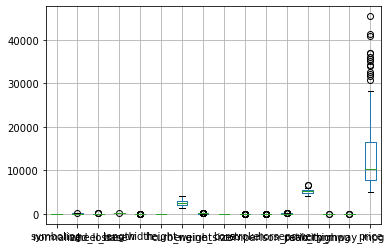

In [10]:
#boxplot
data.boxplot()

array([[<AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'normalized_losses'}>,
        <AxesSubplot:title={'center':'wheel_base'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'curb_weight'}>,
        <AxesSubplot:title={'center':'engine_size'}>],
       [<AxesSubplot:title={'center':'bore'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'comparison_ratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peak_rpm'}>,
        <AxesSubplot:title={'center':'city_mpg'}>,
        <AxesSubplot:title={'center':'highway_mpg'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

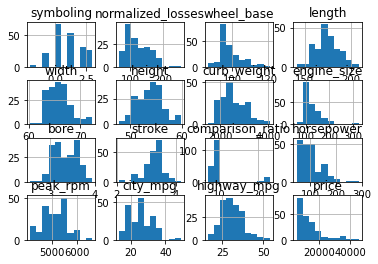

In [11]:
#histogram
data.hist()

In [12]:
#repalce the null values
data=data.replace("?",np.nan)

In [13]:
#3.Replace missing data:normalized_losses=41,no_of_doors=2,bore=4,storke=4,horsepower=2,peak_rpm=2,price=4

In [14]:
data.dropna(subset=["price"],axis=0,inplace=True)

In [15]:
data[["price"]].head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


In [16]:
#3.Replace missing data
data.replace("?",np.nan, inplace=True) #np.nan=numpy replace
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,no_of_doors,body_style,dive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,comparison_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [17]:
#4.Evaluate missing data(isnull() or notnull())
missing_data=data.isnull()

In [18]:
missing_data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,no_of_doors,body_style,dive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,comparison_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
data.mean()

C:\Users\karthika\AppData\Local\Temp/ipykernel_7852/531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


symboling                0.840796
normalized_losses      122.000000
wheel_base              98.797015
length                 174.200995
width                   65.889055
height                  53.766667
curb_weight           2555.666667
engine_size            126.875622
bore                     3.330711
stroke                   3.256904
comparison_ratio        10.164279
horsepower             103.396985
peak_rpm              5117.587940
city_mpg                25.179104
highway_mpg             30.686567
price                13207.129353
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x242e80e2f40>,
 'caps': [<matplotlib.lines.Line2D at 0x242e80f56a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x242e80e2bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x242e80f5dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x242e8100190>],
 'means': []}

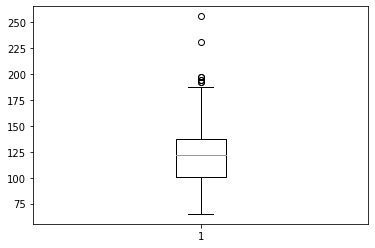

In [20]:
#mean
data.normalized_losses.fillna(122.00,inplace=True)
plt.boxplot(data.normalized_losses)

(array([17., 46., 68., 20., 21., 18.,  9.,  0.,  1.,  1.]),
 array([ 65. ,  84.1, 103.2, 122.3, 141.4, 160.5, 179.6, 198.7, 217.8,
        236.9, 256. ]),
 <BarContainer object of 10 artists>)

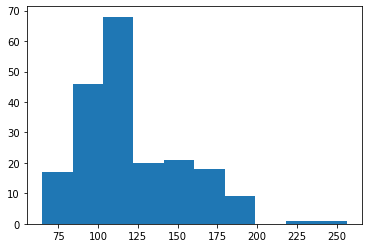

In [21]:
plt.hist(data.normalized_losses)

In [22]:
stats.shapiro(data.normalized_losses)

ShapiroResult(statistic=0.9506608247756958, pvalue=2.0721854525618255e-06)

{'whiskers': [<matplotlib.lines.Line2D at 0x242e81da610>,
 'caps': [<matplotlib.lines.Line2D at 0x242e81dad30>,
 'boxes': [<matplotlib.lines.Line2D at 0x242e81da250>],
 'medians': [<matplotlib.lines.Line2D at 0x242e81e5490>],
 'fliers': [<matplotlib.lines.Line2D at 0x242e81e5820>],
 'means': []}

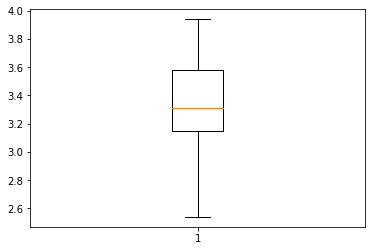

In [23]:
data.bore.fillna(3.329,inplace=True)
plt.boxplot(data.bore)

(array([ 1.,  1.,  8., 35., 39., 28., 27., 42., 17.,  3.]),
 array([2.54, 2.68, 2.82, 2.96, 3.1 , 3.24, 3.38, 3.52, 3.66, 3.8 , 3.94]),
 <BarContainer object of 10 artists>)

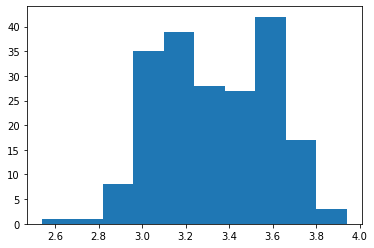

In [24]:
plt.hist(data.bore)

In [25]:
stats.shapiro(data.bore)

ShapiroResult(statistic=0.9660874009132385, pvalue=9.159775800071657e-05)

{'whiskers': [<matplotlib.lines.Line2D at 0x242e82c81f0>,
 'caps': [<matplotlib.lines.Line2D at 0x242e82c8910>,
 'boxes': [<matplotlib.lines.Line2D at 0x242e82b8e20>],
 'medians': [<matplotlib.lines.Line2D at 0x242e82d5070>],
 'fliers': [<matplotlib.lines.Line2D at 0x242e82d5400>],
 'means': []}

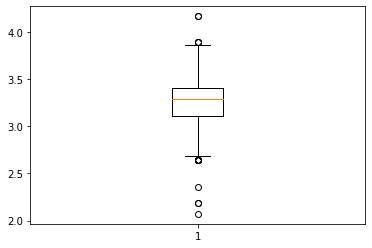

In [26]:
data.stroke.fillna(3.255,inplace=True)
plt.boxplot(data.stroke)

(array([ 3.,  1., 13.,  7., 27., 56., 70., 15.,  7.,  2.]),
 array([2.07, 2.28, 2.49, 2.7 , 2.91, 3.12, 3.33, 3.54, 3.75, 3.96, 4.17]),
 <BarContainer object of 10 artists>)

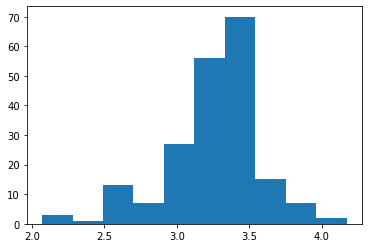

In [27]:
plt.hist(data.stroke)

In [28]:
stats.shapiro(data.stroke)

ShapiroResult(statistic=0.9374514818191528, pvalue=1.3026800615989487e-07)

{'whiskers': [<matplotlib.lines.Line2D at 0x242e83b4ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x242e83c0400>,
 'boxes': [<matplotlib.lines.Line2D at 0x242e83b48e0>],
 'medians': [<matplotlib.lines.Line2D at 0x242e83c0b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x242e83c0eb0>],
 'means': []}

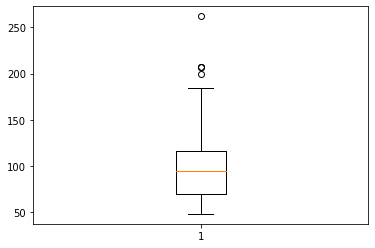

In [29]:
data.horsepower.fillna(104.25,inplace=True)
plt.boxplot(data.horsepower)

(array([44., 45., 48., 24., 14., 16.,  5.,  4.,  0.,  1.]),
 array([ 48. ,  69.4,  90.8, 112.2, 133.6, 155. , 176.4, 197.8, 219.2,
        240.6, 262. ]),
 <BarContainer object of 10 artists>)

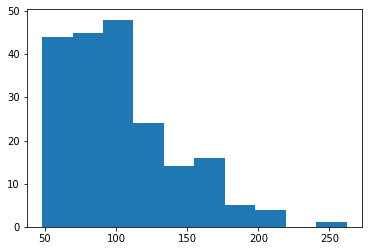

In [30]:
plt.hist(data.horsepower)

In [31]:
stats.shapiro(data.horsepower)

ShapiroResult(statistic=0.9049049019813538, pvalue=4.854735502490826e-10)

{'whiskers': [<matplotlib.lines.Line2D at 0x242e84962b0>,
 'caps': [<matplotlib.lines.Line2D at 0x242e84969d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x242e8485ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x242e84a1130>],
 'fliers': [<matplotlib.lines.Line2D at 0x242e84a14c0>],
 'means': []}

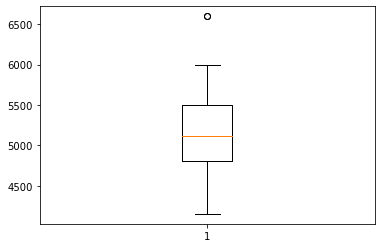

In [32]:
data.peak_rpm.fillna(5117.58,inplace=True)
plt.boxplot(data.peak_rpm)

(array([17., 10., 41., 33., 31., 48.,  7., 12.,  0.,  2.]),
 array([4150., 4395., 4640., 4885., 5130., 5375., 5620., 5865., 6110.,
        6355., 6600.]),
 <BarContainer object of 10 artists>)

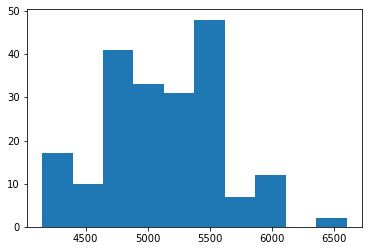

In [33]:
plt.hist(data.peak_rpm)

In [34]:
stats.shapiro(data.peak_rpm)

ShapiroResult(statistic=0.9700828194618225, pvalue=0.0002775692555587739)

In [35]:
#mode
data.no_of_doors.value_counts()

four    113
two      86
Name: no_of_doors, dtype: int64

<AxesSubplot:xlabel='no_of_doors', ylabel='count'>

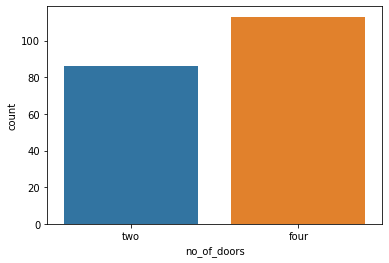

In [36]:
sns.countplot(x="no_of_doors",data=data)

In [37]:
data["no_of_doors"].value_counts().idxmax() #idxmax-maximum value in dataset

'four'

In [38]:
data["no_of_doors"].replace(np.nan,"four",inplace=True)


In [39]:
#drop
data.drop(["price"],axis=1)

,symboling,normalized_losses,make,fuel_type,aspiration,no_of_doors,body_style,dive_wheels,engine_location,wheel_base,...,no_of_cylinders,engine_size,fuel_system,bore,stroke,comparison_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27


In [40]:
data["price"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Name: price, Length: 201, dtype: bool

In [41]:
data["price"].isnull().count()

201

In [42]:
#reset
data.reset_index(drop=True,inplace=True)

In [43]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,no_of_doors,body_style,dive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,comparison_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [44]:
data.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
no_of_doors           object
body_style            object
dive_wheels           object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
no_of_cylinders       object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
comparison_ratio     float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

C:\Users\karthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='symboling', ylabel='count'>

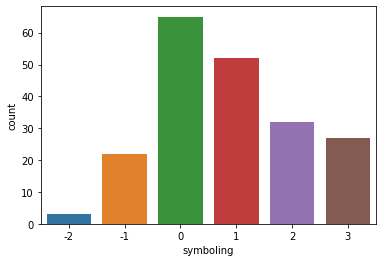

In [45]:
sns.countplot(data.symboling)

In [46]:
data.normalized_losses=data.symboling.replace([-2,-1,0],"0")

<AxesSubplot:xlabel='symboling', ylabel='count'>

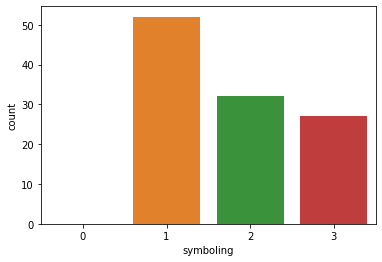

In [47]:
sns.countplot(x="symboling",data=data,order=["0",1,2,3])

(array([ 3.,  0., 22.,  0., 65.,  0., 52.,  0., 32., 27.]),
 array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ]),
 <BarContainer object of 10 artists>)

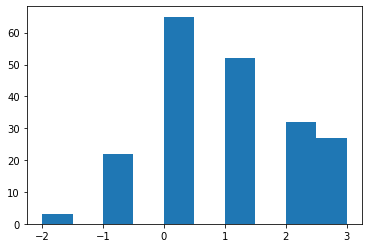

In [48]:
plt.hist(data.symboling)

In [49]:
stats.shapiro(data.symboling)

ShapiroResult(statistic=0.9175949692726135, pvalue=3.6368879019477163e-09)

In [50]:
data.normalized_losses.describe()
data.normalized_losses.value_counts()

0    90
1    52
2    32
3    27
Name: normalized_losses, dtype: int64

In [51]:
data.normalized_losses.fillna(data.normalized_losses.median(),inplace=True)

In [52]:
data.make.describe()

count        201
unique        22
top       toyota
freq          32
Name: make, dtype: object

<AxesSubplot:xlabel='make', ylabel='count'>

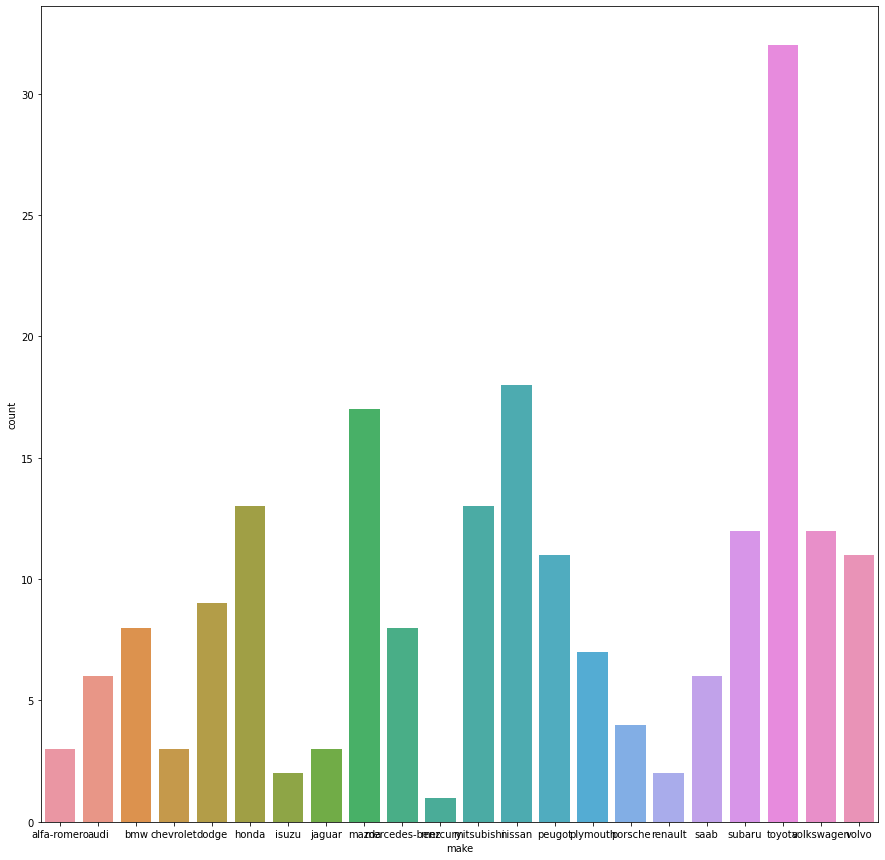

In [53]:
plt.figure(figsize=(15,15))
sns.countplot(x="make",data=data)

<AxesSubplot:xlabel='fuel_type', ylabel='count'>

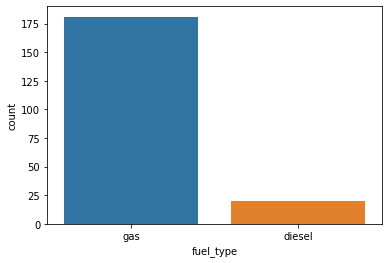

In [54]:
sns.countplot(x="fuel_type",data=data)

<AxesSubplot:xlabel='aspiration', ylabel='count'>

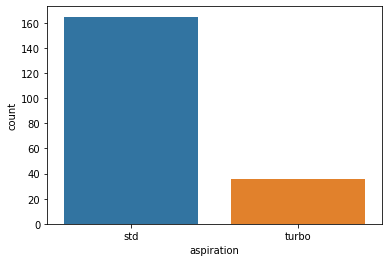

In [55]:
sns.countplot(x="aspiration",data=data)

<AxesSubplot:xlabel='body_style', ylabel='count'>

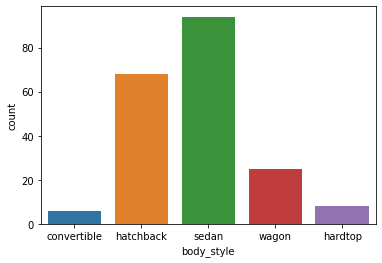

In [56]:
sns.countplot(x="body_style",data=data)

<AxesSubplot:xlabel='dive_wheels', ylabel='count'>

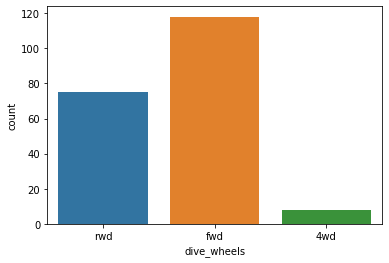

In [57]:
sns.countplot(x="dive_wheels",data=data)

<AxesSubplot:xlabel='engine_location', ylabel='count'>

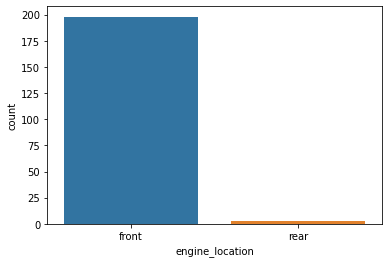

In [58]:
sns.countplot(x="engine_location",data=data)

{'whiskers': [<matplotlib.lines.Line2D at 0x242e89a87f0>,
 'caps': [<matplotlib.lines.Line2D at 0x242e89a8f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x242e89a8460>],
 'medians': [<matplotlib.lines.Line2D at 0x242e89b2670>],
 'fliers': [<matplotlib.lines.Line2D at 0x242e89b2a00>],
 'means': []}

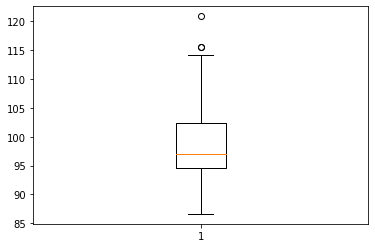

In [59]:
plt.boxplot(data.wheel_base)

ShapiroResult(statistic=0.9133144617080688, pvalue=1.8062684681297014e-09)

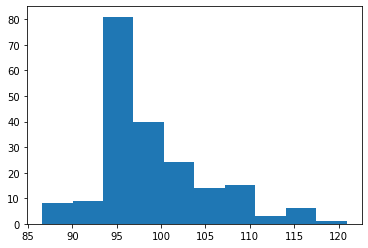

In [60]:
plt.hist(data.wheel_base)
stats.shapiro(data.wheel_base)

{'whiskers': [<matplotlib.lines.Line2D at 0x242e8a9e190>,
 'caps': [<matplotlib.lines.Line2D at 0x242e8a9e8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x242e8a8bdc0>],
 'medians': [<matplotlib.lines.Line2D at 0x242e8a9efd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x242e8aa83a0>],
 'means': []}

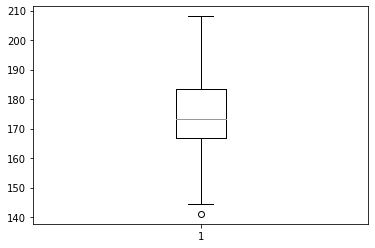

In [61]:
plt.boxplot(data.length)

ShapiroResult(statistic=0.9815887808799744, pvalue=0.009762571193277836)

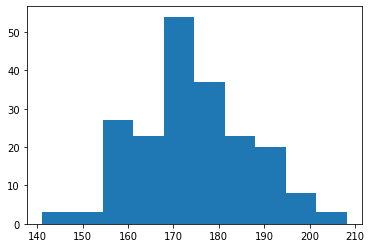

In [62]:
plt.hist(data.length)
stats.shapiro(data.length)

{'whiskers': [<matplotlib.lines.Line2D at 0x242e8b7f820>,
 'caps': [<matplotlib.lines.Line2D at 0x242e8b7ff40>,
 'boxes': [<matplotlib.lines.Line2D at 0x242e8b7f490>],
 'medians': [<matplotlib.lines.Line2D at 0x242e8b896a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x242e8b89a30>],
 'means': []}

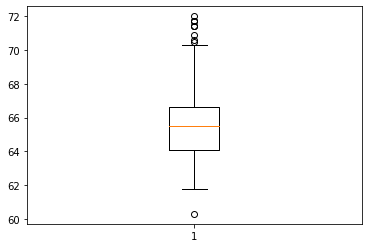

In [63]:
plt.boxplot(data.width)

ShapiroResult(statistic=0.923720121383667, pvalue=1.0309815223763508e-08)

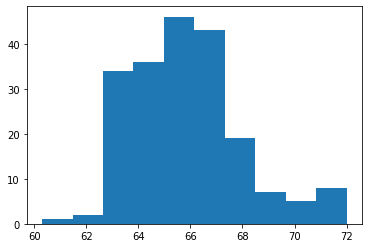

In [64]:
plt.hist(data.width)
stats.shapiro(data.width)

{'whiskers': [<matplotlib.lines.Line2D at 0x242e9f19cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x242e9f28430>,
 'boxes': [<matplotlib.lines.Line2D at 0x242e9f19940>],
 'medians': [<matplotlib.lines.Line2D at 0x242e9f28b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x242e9f28ee0>],
 'means': []}

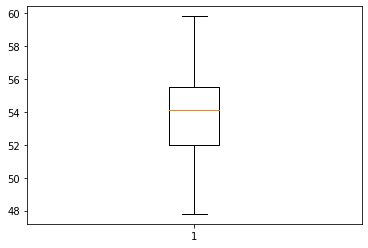

In [65]:
plt.boxplot(data.height)

ShapiroResult(statistic=0.9839545488357544, pvalue=0.021752528846263885)

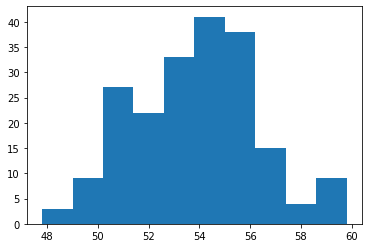

In [66]:
plt.hist(data.height)
stats.shapiro(data.height)

{'whiskers': [<matplotlib.lines.Line2D at 0x242ea0089d0>,
 'caps': [<matplotlib.lines.Line2D at 0x242ea015130>,
 'boxes': [<matplotlib.lines.Line2D at 0x242ea008610>],
 'medians': [<matplotlib.lines.Line2D at 0x242ea015850>],
 'fliers': [<matplotlib.lines.Line2D at 0x242ea015be0>],
 'means': []}

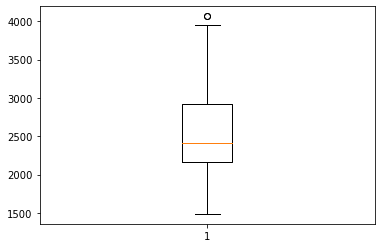

In [67]:
plt.boxplot(data.curb_weight)

ShapiroResult(statistic=0.9525007009506226, pvalue=3.1428055535798194e-06)

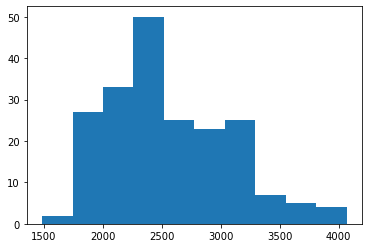

In [68]:
plt.hist(data.curb_weight)
stats.shapiro(data.curb_weight)

C:\Users\karthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine_type', ylabel='count'>

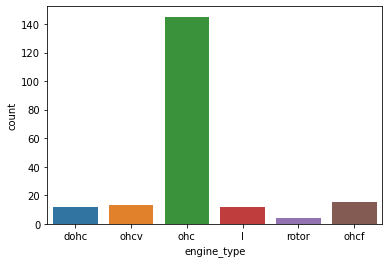

In [69]:
sns.countplot(data.engine_type)

C:\Users\karthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_of_cylinders', ylabel='count'>

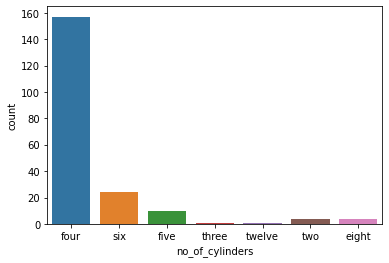

In [70]:
sns.countplot(data.no_of_cylinders)

C:\Users\karthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine_size', ylabel='count'>

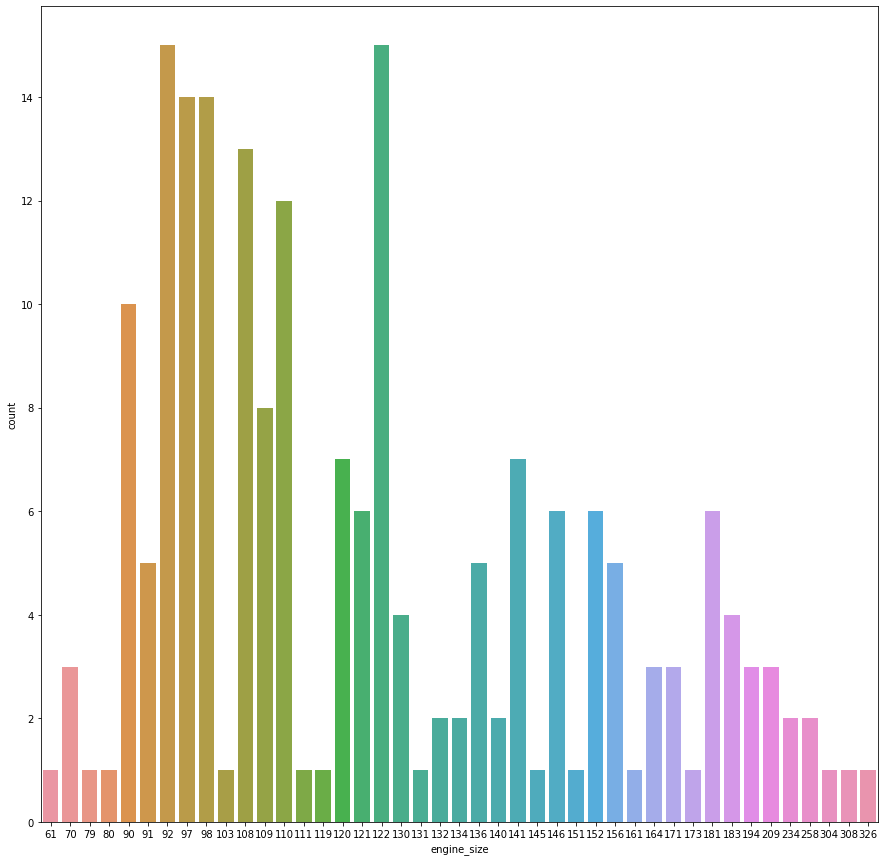

In [71]:
plt.figure(figsize=(15,15))
sns.countplot(data.engine_size)


C:\Users\karthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel_system', ylabel='count'>

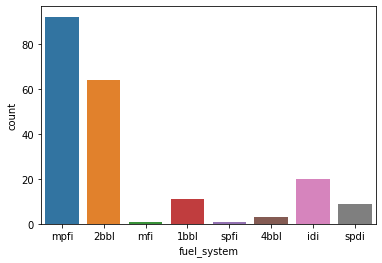

In [72]:
sns.countplot(data.fuel_system)

{'whiskers': [<matplotlib.lines.Line2D at 0x242ea1a94f0>,
 'caps': [<matplotlib.lines.Line2D at 0x242ea1a9c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x242ea1a9160>],
 'medians': [<matplotlib.lines.Line2D at 0x242e8b09370>],
 'fliers': [<matplotlib.lines.Line2D at 0x242e8b09700>],
 'means': []}

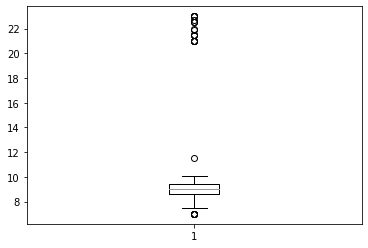

In [73]:
plt.boxplot(data.comparison_ratio)

ShapiroResult(statistic=0.49651628732681274, pvalue=1.2628169778894816e-23)

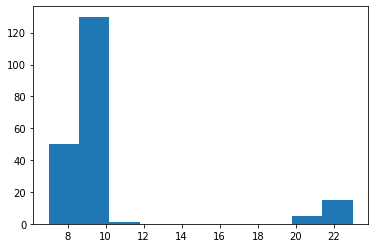

In [74]:
plt.hist(data.comparison_ratio)
stats.shapiro(data.comparison_ratio)

{'whiskers': [<matplotlib.lines.Line2D at 0x242ea1ed1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x242ea1ed910>,
 'boxes': [<matplotlib.lines.Line2D at 0x242ea1dfe20>],
 'medians': [<matplotlib.lines.Line2D at 0x242ea1f80a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x242ea1f8430>],
 'means': []}

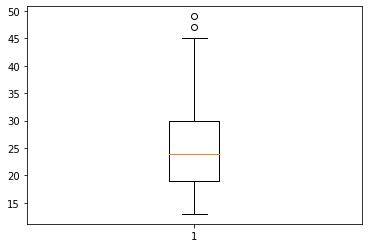

In [75]:
plt.boxplot(data.city_mpg)

ShapiroResult(statistic=0.9570485353469849, pvalue=9.14016072783852e-06)

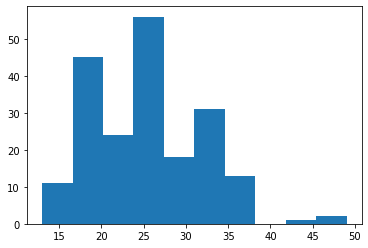

In [76]:
plt.hist(data.city_mpg)
stats.shapiro(data.city_mpg)

{'whiskers': [<matplotlib.lines.Line2D at 0x242ea2ce9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x242ea2dc130>,
 'boxes': [<matplotlib.lines.Line2D at 0x242ea2ce640>],
 'medians': [<matplotlib.lines.Line2D at 0x242ea2dc850>],
 'fliers': [<matplotlib.lines.Line2D at 0x242ea2dcbe0>],
 'means': []}

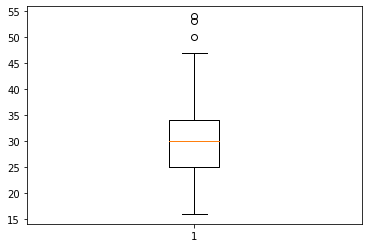

In [77]:
plt.boxplot(data.highway_mpg)

ShapiroResult(statistic=0.9722383618354797, pvalue=0.0005180398002266884)

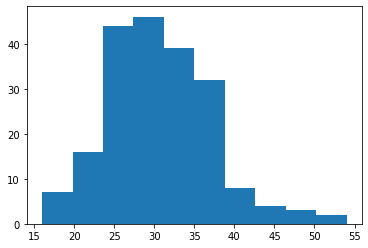

In [78]:
plt.hist(data.highway_mpg)
stats.shapiro(data.highway_mpg)

In [79]:
from scipy import stats
stats.pearsonr(data.symboling,data.price)

(-0.08239118716962358, 0.2449148765716521)

In [80]:
train=data.iloc[:184]
data.iloc[:184]

,symboling,normalized_losses,make,fuel_type,aspiration,no_of_doors,body_style,dive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,comparison_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2,2,volkswagen,gas,std,two,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,9.0,85.0,5250.0,27,34,7975.0
180,2,2,volkswagen,diesel,std,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.40,23.0,52.0,4800.0,37,46,7995.0
181,2,2,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,9.0,85.0,5250.0,27,34,8195.0
182,2,2,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,9.0,85.0,5250.0,27,34,8495.0


In [81]:
test=data.iloc[184:]
data.iloc[184:]


,symboling,normalized_losses,make,fuel_type,aspiration,no_of_doors,body_style,dive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,comparison_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
184,2,2,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,10.0,100.0,5500.0,26,32,9995.0
185,3,3,volkswagen,gas,std,two,convertible,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90.0,5500.0,24,29,11595.0
186,3,3,volkswagen,gas,std,two,hatchback,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90.0,5500.0,24,29,9980.0
187,0,0,volkswagen,gas,std,four,sedan,fwd,front,100.4,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,24,13295.0
188,0,0,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68.0,4500.0,33,38,13845.0
189,0,0,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88.0,5500.0,25,31,12290.0
190,-2,0,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,12940.0
191,-1,0,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,13415.0
192,-2,0,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,24,28,15985.0
193,-1,0,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,24,28,16515.0


In [82]:
train_x=train.price
train_y=train.engine_size
train_x=sm.add_constant(train_x)

C:\Users\karthika\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [83]:
model=sm.OLS(train_y,train_x).fit()

In [84]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            engine_size   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     610.2
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           5.02e-60
Time:                        10:59:13   Log-Likelihood:                -817.52
No. Observations:                 184   AIC:                             1639.
Df Residuals:                     182   BIC:                             1645.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.5498      2.865     23.229      0.000      60.897      72.203
price          0.0046      0.000     24.702      0.000       0.004       0.005
==============================================================================
Omnibus:                       21.084   Durbin-Watson:                   0.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.029
Skew:                           0.426   Prob(JB):                     6.81e-13
Kurtosis:                       5.566   Cond. No.                     2.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
model.predict()

array([128.92172686, 142.81039037, 142.81039037, 131.02466925,
       147.20114922, 137.0330761 , 148.40283058, 153.9952708 ,
       176.89654457, 142.48686077, 144.77467722, 163.47006621,
       164.09401615, 180.08562205, 208.71799159, 257.5016333 ,
       237.00372226,  90.35699863,  95.64439665,  96.93851505,
        92.30279807,  96.02338847, 103.32591371,  95.33935446,
        97.47927166, 101.71750941, 106.10364641, 107.78137847,
       126.46752376,  96.49481731,  98.23263344,  91.50321778,
        96.72590988,  99.49902073, 100.26624807, 100.26624807,
       103.03935892, 108.58558062, 107.43011776, 114.13180232,
       126.37970858, 114.36289489,  97.90910384, 117.61205644,
       215.6045502 , 230.85665988, 232.93649302,  90.56036009,
        94.72002637,  97.95532236,  97.49313722, 100.72843321,
       117.13600574, 121.29567202, 129.61500457, 138.85870741,
       107.43011776, 105.81246977, 115.51835775, 113.90070975,
       116.44272803, 118.52256117, 151.03728589, 151.33

In [86]:
test_x=test.price
test_y=test.engine_size
test_x=sm.add_constant(test_x)

C:\Users\karthika\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [87]:
pre_test=model.predict(test_x)

In [88]:
model.predict(test_x)

184    112.745247
185    120.140209
186    112.675919
187    127.997357
188    130.539375
189    123.352396
190    126.356599
191    128.551979
192    140.430137
193    142.879718
194    151.684345
195    154.133926
196    144.404929
197    154.573002
198    165.850320
199    170.402843
200    171.119230
dtype: float64

In [89]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            engine_size   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     610.2
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           5.02e-60
Time:                        10:59:14   Log-Likelihood:                -817.52
No. Observations:                 184   AIC:                             1639.
Df Residuals:                     182   BIC:                             1645.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.5498      2.865     23.229      0.000      60.897      72.203
price          0.0046      0.000     24.702      0.000       0.004       0.005
==============================================================================
Omnibus:                       21.084   Durbin-Watson:                   0.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.029
Skew:                           0.426   Prob(JB):                     6.81e-13
Kurtosis:                       5.566   Cond. No.                     2.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
Q1=data.wheel_base.quantile(0.25)
Q3=data.wheel_base.quantile(0.75)
IQR=Q3-Q1
UE=Q3+1.5*(IQR)
LE=Q1-1.5*(IQR)

In [94]:
print(UE)

114.25000000000001


In [95]:
print(LE)

82.64999999999999


In [107]:
#remove outlier
data[(data.wheel_base<UE)&(data.wheel_base>LE)]

,symboling,normalized_losses,make,fuel_type,aspiration,no_of_doors,body_style,dive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,comparison_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,82.65,9.0,111.0,5000.0,21,27,13495.0
1,3,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,82.65,9.0,111.0,5000.0,21,27,16500.0
2,1,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,82.65,9.0,154.0,5000.0,19,26,16500.0
3,2,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,82.65,10.0,102.0,5500.0,24,30,13950.0
4,2,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,82.65,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,82.65,9.5,114.0,5400.0,23,28,16845.0
197,-1,0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,82.65,8.7,160.0,5300.0,19,25,19045.0
198,-1,0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,82.65,8.8,134.0,5500.0,18,23,21485.0
199,-1,0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,82.65,23.0,106.0,4800.0,26,27,22470.0


In [113]:
#display outlier
data.wheel_base[data.wheel_base>UE]=UE      #(dropping)

C:\Users\karthika\AppData\Local\Temp/ipykernel_7852/4215403650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.wheel_base[data.wheel_base>UE]=UE      #(capping)


In [114]:
data.wheel_base[data.wheel_base<LE]=LE  #capping

C:\Users\karthika\AppData\Local\Temp/ipykernel_7852/3201061370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.wheel_base[data.wheel_base<LE]=LE


{'whiskers': [<matplotlib.lines.Line2D at 0x242eafe9970>,
 'caps': [<matplotlib.lines.Line2D at 0x242eaff60d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x242eafe95e0>],
 'medians': [<matplotlib.lines.Line2D at 0x242eaff67f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x242eaff6b80>],
 'means': []}

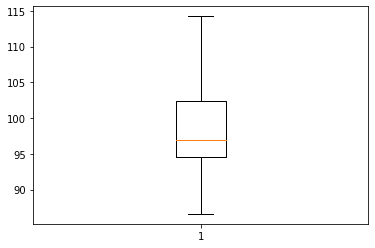

In [115]:
plt.boxplot(data.wheel_base)